# Modelling


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os

path = "C:/Users/caspa/OneDrive/00 DataScientist/Projekt/HSOS"
os.chdir(path)

df = pd.read_csv("data_to_ML_model.csv")
df.head()

,Returnees reported in the community,Three most common IDP shelter types - Solid finished apartment,Three most common IDP shelter types - Unfinished or abandoned residential building,Three most common IDP shelter types - Damaged residential building,Three most common IDP shelter types - Non residential structure with one family,Three most common IDP shelter types - Collective center with more than one family,Three most common IDP shelter types - Tent,Proportion of IDPs living in overcrowded shelters,IDP shelter inadequacies - Lack of lighting inside shelter,IDP shelter inadequacies - Lack of lighting around shelter,...,Livelihood support,Education,WASH,Winterisation,Legal services,GBV services,CP services,Explosive hazard risk awareness or removal of explosive contamination,Mental health psychological support,Cash assistance vouchers or cash in hand
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
target_columns = ['Shelter', 'Health', 'NFIs', 'Electricity assistance', 'Food, nutrition', 'Agricultural supplies', 'Livelihood support',
                  'Education', 'WASH', 'Winterisation', 'Legal services', 'GBV services', 'CP services',
                  'Explosive hazard risk awareness or removal of explosive contamination', 'Mental health psychological support',
                  'Cash assistance vouchers or cash in hand']
target2 = "Were IDP households in the community able to access humanitarian aid in the last 30 days?"

df["target"] = df[target_columns].eq(1).any(axis=1).astype(int)

y2 = df[target2]
y = df["target"]
X = df.drop(columns = target_columns + ["target"] + [target2], axis = 1)

In [5]:
print("Shape Y2: ", y2.shape)
print("Shape Y: ", y.shape)
print("Shape X: ", X.shape)

Shape Y2:  (32912,)
Shape Y:  (32912,)
Shape X:  (32912, 496)


## Distributions Targets

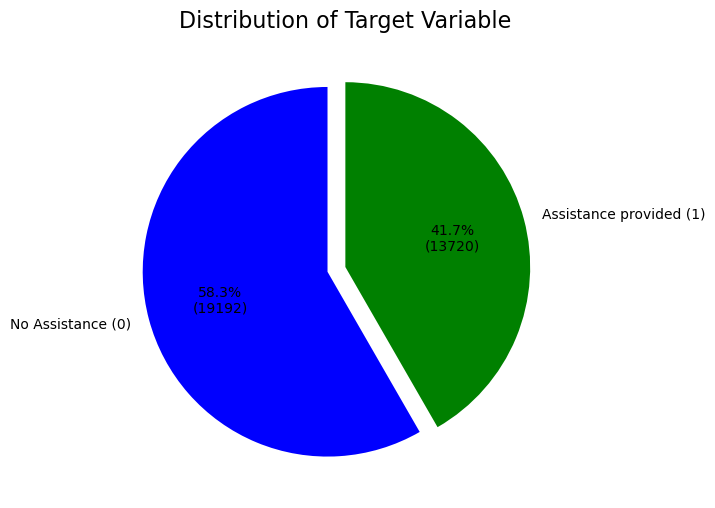

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 

target_counts = y.value_counts()

labels = ["No Assistance (0)", "Assistance provided (1)"]

# Function to display percentage and count
def autopct_with_count(pct, all_counts):
    total = sum(all_counts)
    count = int(round(pct * total / 100))
    return f"{pct:.1f}%\n({count})" if pct > 0 else ""

plt.figure(figsize=(6, 6))
plt.pie(
    target_counts,               
    labels=labels,               
    autopct=lambda pct: autopct_with_count(pct, target_counts),  
    startangle=90,               
    colors=["blue", "green"],  
    explode=(0.1, 0)             
)
plt.title("Distribution of Target Variable", fontsize=16)
plt.show()

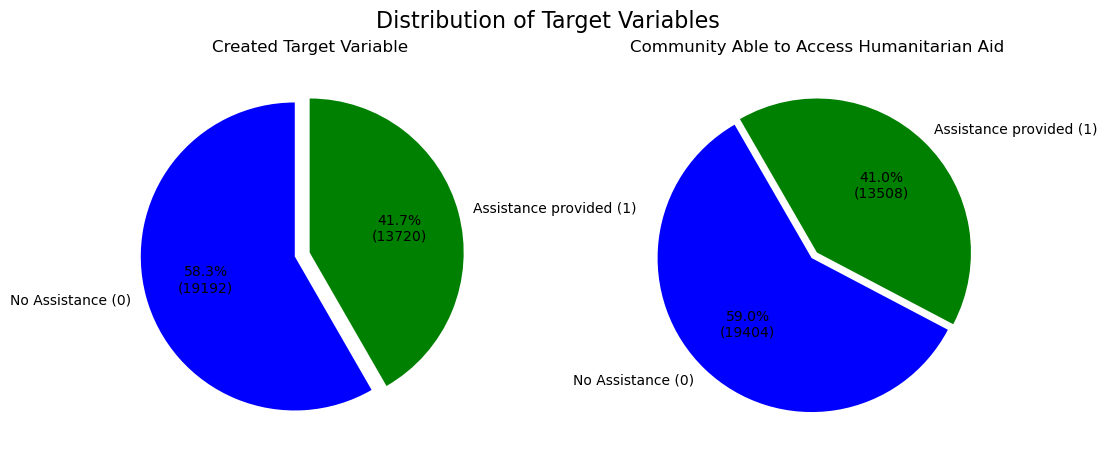

In [19]:
# Visual representation
import matplotlib.pyplot as plt
%matplotlib inline 
# Count values
target_counts = y.value_counts()
target_counts2 = y2.value_counts()

labels = ["No Assistance (0)", "Assistance provided (1)"]

# Function to display percentage and count
def autopct_with_count(pct, all_counts):
    total = sum(all_counts)
    count = int(round(pct * total / 100))
    return f"{pct:.1f}%\n({count})" if pct > 0 else ""

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Distribution of Target Variables", fontsize=16)

# Plot first pie chart
axes[0].pie(
    target_counts,               
    labels=labels,               
    autopct=lambda pct: autopct_with_count(pct, target_counts),           
    startangle=90,               
    colors=["blue", "green"],  
    explode=(0.1, 0) 
)
axes[0].set_title("Created Target Variable")

# Plot second pie chart
axes[1].pie(
    target_counts2,               
    labels=labels,               
    autopct=lambda pct: autopct_with_count(pct, target_counts2),           
    startangle=120,               
    colors=["blue", "green"],  
    explode=(0.05, 0) 
)
axes[1].set_title("Community Able to Access Humanitarian Aid")

# Show plot
plt.show()


# Modelling with Y

In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Logistic Regression

In [65]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

# Model training and prediction
log_reg = LogisticRegression(max_iter=100).fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Results
print("Logistische Regression:\n", classification_report(y_test, y_pred_log))
print(pd.crosstab(y_test, y_pred_log))

# Cross-Validation Score
scores = cross_val_score(LogisticRegression(max_iter=500), X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {scores.mean():.6f}")

C:\Users\caspa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistische Regression:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      2739
           1       0.96      0.91      0.93      3844

    accuracy                           0.92      6583
   macro avg       0.92      0.93      0.92      6583
weighted avg       0.93      0.92      0.92      6583

col_0      0     1
target            
0       2590   149
1        347  3497
Cross-validation accuracy: 0.920012


In [66]:
log_reg.score(X_test, y_test)

0.9246544128816649

## Random Forest

In [59]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier

# Model training and prediction
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Results
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(pd.crosstab(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2739
           1       0.96      0.94      0.95      3844

    accuracy                           0.95      6583
   macro avg       0.94      0.95      0.94      6583
weighted avg       0.95      0.95      0.95      6583

col_0      0     1
target            
0       2598   141
1        219  3625


In [61]:
print(rf_model.score(X_test, y_test))

0.9453136867689503


## XGBoost

In [53]:
## XGBoost
import xgboost as xgb

# Model training and prediction
xgb_model = xgb.XGBClassifier(eval_metric="logloss")
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Results
print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print(pd.crosstab(y_test, y_pred_xgb))


# Importance Scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Top 10 wichtigste Features
print(feature_importance_df.head(15))

# Feature-Importance Diagramm
xgb.plot_importance(xgb_model, max_num_features=15)
plt.show()

C:\Users\caspa\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:40:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2739
           1       0.98      0.94      0.96      3844

    accuracy                           0.95      6583
   macro avg       0.95      0.95      0.95      6583
weighted avg       0.95      0.95      0.95      6583

col_0      0     1
target            
0       2649    90
1        231  3613
                                               Feature  Importance
323  IDP groups affected by protection risks - Lack...    0.158791
427  Are households in the location aware of a huma...    0.095305
206  Most common sources of meeting basic needs for...    0.055140
437                                  Governorate_Idleb    0.044004
108  Barriers to accessing electricity in the last ...    0.026042
436                            Governorate_Deir-ez-Zor    0.025357
433                             Governorate_Al-Hasakeh    0.019344
332  IDP groups affected by protection risks - Thre.

## SVM

In [65]:
## SVM
from sklearn.svm import SVC

# Model training and prediction
svm_model = SVC(kernel="rbf", probability=True)  # RBF-Kernel for non-linear problems
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Results
print("SVM:")
print(classification_report(y_test, y_pred_svm))
print(pd.crosstab(y_test, y_pred_svm))

SVM:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2739
           1       0.97      0.93      0.95      3844

    accuracy                           0.94      6583
   macro avg       0.94      0.94      0.94      6583
weighted avg       0.94      0.94      0.94      6583

col_0      0     1
target            
0       2619   120
1        280  3564


## SGD

In [19]:
## SGD
from sklearn.linear_model import SGDClassifier

# Model training and prediction
sgd_model = SGDClassifier(loss="log_loss", random_state = 42)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

# Result
print("SGD:")
print(classification_report(y_test, y_pred_sgd))
print(pd.crosstab(y_test, y_pred_sgd))

sgd_f1 = f1_score(y_test, y_pred_sgd)
print(f"SGD Classifier F1: {sgd_f1}")


SGD:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2739
           1       0.93      0.94      0.93      3844

    accuracy                           0.92      6583
   macro avg       0.92      0.91      0.92      6583
weighted avg       0.92      0.92      0.92      6583

col_0      0     1
target            
0       2449   290
1        247  3597
SGD Classifier F1: 0.9305393868839736


# Finetuning 

## Gridsearch SGD

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

# Hyperparameter for SGDClassifier
sgd_params = {
    "loss": ["hinge", "log_loss"],  # Hinge = SVM, Log = Log Regression
    "alpha": [0.0001, 0.001, 0.01],  
    "penalty": ["l2", "l1", "elasticnet"],
    "max_iter": [1000, 5000],
}

sgd = SGDClassifier(random_state=42)
sgd_grid = GridSearchCV(sgd, param_grid=sgd_params, cv=5, scoring="accuracy", n_jobs=-1, error_score="raise")
sgd_grid.fit(X_train, y_train)
y_pred_sgd_grid = sgd_grid.predict(X_test)

print("Best SGD Parameters:", sgd_grid.best_params_)
print("Best SGD Accuracy:", sgd_grid.best_score_)

sgd_f1 = f1_score(y_test, y_pred_sgd_grid)
print(f"SGD Classifier F1: {sgd_f1}")



Best SGD Parameters: {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'elasticnet'}
Best SGD Accuracy: 0.9232025547609799
SGD Classifier F1: 0.9339572192513369


## XGBoost

In [13]:
# Hyperparameter Opt for XGBoost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb_params = {
    "n_estimators": [100, 300, 500],  
    "max_depth": [3, 6, 9], 
    "learning_rate": [0.01, 0.1, 0.2], 
    "subsample": [0.8, 1],  
    "colsample_bytree": [0.8, 1], 
}

xgb_model = XGBClassifier(eval_metric="logloss", random_state=42)
xgb_grid = GridSearchCV(xgb_model, param_grid=xgb_params, cv=5, scoring="accuracy", n_jobs=-1)
xgb_grid.fit(X_train, y_train)
y_pred_xgb_grid = xgb_grid.predict(X_test)

print("Best XGBoost Parameters:", xgb_grid.best_params_)
print("Best XGBoost Accuracy:", xgb_grid.best_score_)

xgb_f1 = f1_score(y_test, y_pred_xgb_grid)
print(f"XGB Classifier F1: {xgb_f1}")

Best XGBoost Parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 300, 'subsample': 1}
Best XGBoost Accuracy: 0.9530175445050746
SGD Classifier F1: 0.9603698811096433


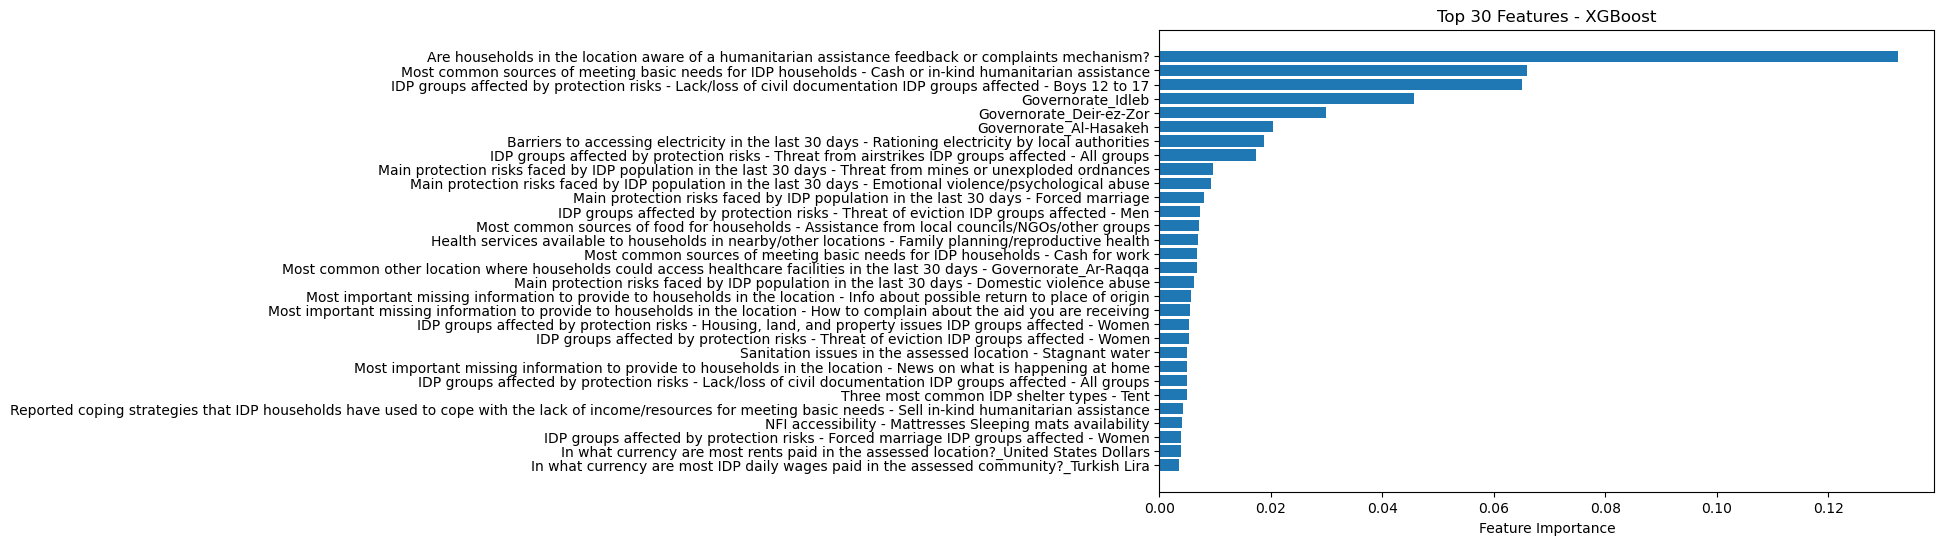

In [15]:
# Feature Importance XGBoost
import matplotlib.pyplot as plt
%matplotlib inline 
feature_importance = xgb_grid.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(np.array(X_train.columns)[sorted_idx][-30:], feature_importance[sorted_idx][-30:])
plt.xlabel("Feature Importance")
plt.title("Top 30 Features - XGBoost")
plt.show()

In [17]:
gleichnull = feature_importance[sorted_idx] == 0
print("Shape: ", X_train.columns[gleichnull].shape)
print("Feature names \n", X_train.columns[gleichnull])


Shape:  (27,)
Feature names 
 Index(['Returnees reported in the community',
       'Three most common IDP shelter types - Solid finished apartment',
       'Three most common IDP shelter types - Unfinished or abandoned residential building',
       'Three most common IDP shelter types - Damaged residential building',
       'Three most common IDP shelter types - Non residential structure with one family',
       'Three most common IDP shelter types - Collective center with more than one family',
       'Three most common IDP shelter types - Tent',
       'Proportion of IDPs living in overcrowded shelters',
       'IDP shelter inadequacies - Lack of lighting inside shelter',
       'IDP shelter inadequacies - Lack of lighting around shelter',
       'IDP shelter inadequacies - Lack of heating',
       'IDP shelter inadequacies - Lack of insulation from cold',
       'IDP shelter inadequacies - High temperatures inside shelters',
       'IDP shelter inadequacies - Lack of toilets',
     

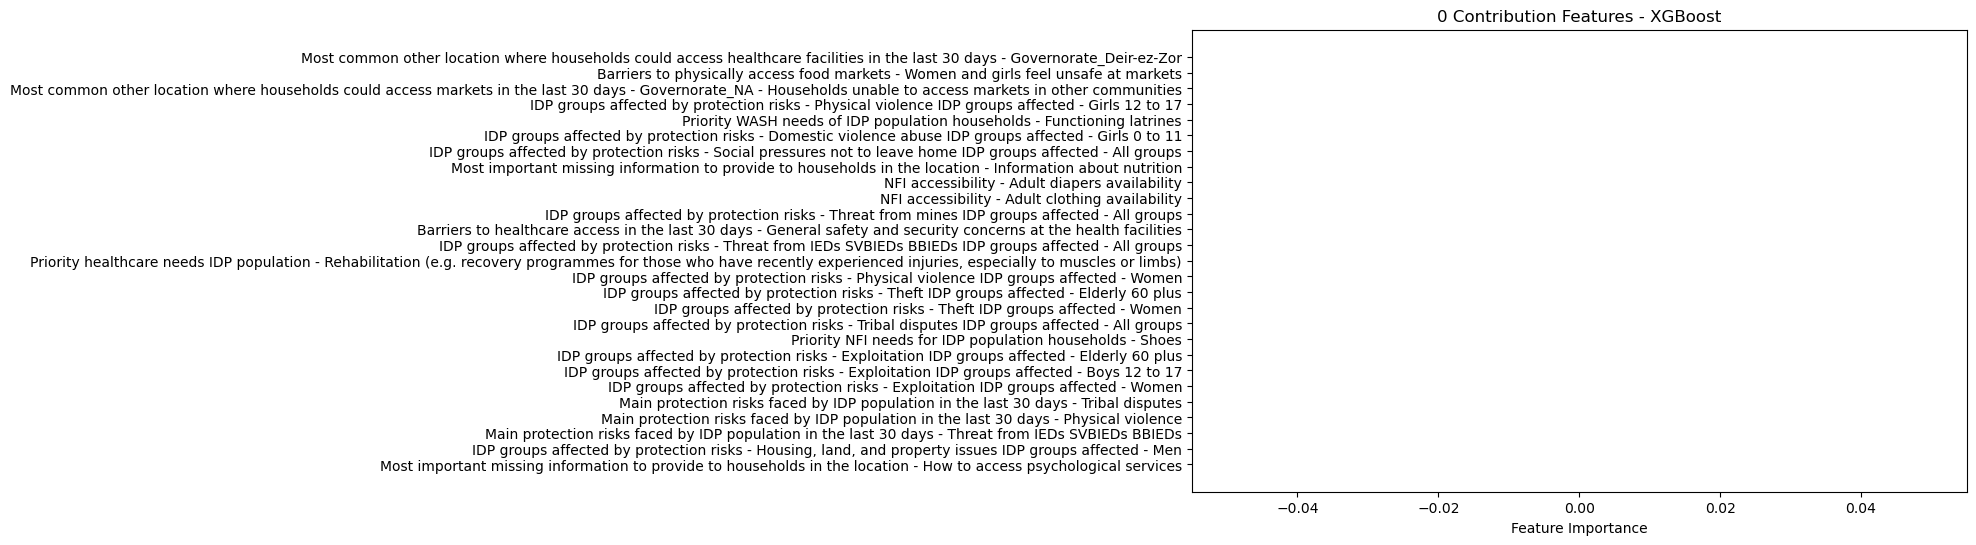

In [31]:
import matplotlib.pyplot as plt
feature_importance = xgb_grid.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(np.array(X_train.columns)[sorted_idx][:27], feature_importance[sorted_idx][:27])
plt.xlabel("Feature Importance")
plt.title("0 Contribution Features - XGBoost")
plt.show()

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
print("Feature Importance Shape:", feature_importance.shape)

important_features = X_train.columns[sorted_idx][27:]
print("Importance Shape:", important_features.shape)

X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# XGBoost-Model Training with best parameters
xgb_model2 = XGBClassifier(
        eval_metric="logloss", colsample_bytree=1, learning_rate=0.2, 
        max_depth=9, n_estimators=300, subsample=1, random_state=42
    )
    
xgb_model2.fit(X_train_important, y_train)  
y_pred_xgb_important = xgb_model2.predict(X_test_important)
    
# Metrics
f1 = f1_score(y_test, y_pred_xgb_important)
precision = precision_score(y_test, y_pred_xgb_important)
recall = recall_score(y_test, y_pred_xgb_important)

print("XGBoost Accuracy:", xgb_model2.score(X_test_important, y_test))
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-Score: {f1}")


Feature Importance Shape: (496,)
Importance Shape: (469,)
XGBoost Accuracy: 0.9550356980100259
Recall: 0.9466701352757544
Precision: 0.975603217158177
F1-Score: 0.9609189331925007


In [53]:
# Remove unimportant features
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

print("Feature Importance Shape:", feature_importance.shape)
important_features = X_train.columns[feature_importance > 0.0009]  # tested 0.01 - 0.0005
print("Shape of most important features:", important_features.shape)

feature_thresholds = {
    8: 0.01,
    21: 0.005,
    50: 0.0025,
    72: 0.002,
    118: 0.0015,
    228: 0.001,
    259: 0.0009,
    294: 0.0008,
    421: 0.0005
}

results = []

for num_features, threshold in feature_thresholds.items():
    # Threshold anwenden
    important_features = X_train.columns[feature_importance > threshold]

    # Reduzierte Feature-Sets erstellen
    X_train_important = X_train[important_features]
    X_test_important = X_test[important_features]

    # XGBoost-Model Training mit besten Parametern
    xgb_model = XGBClassifier(
        eval_metric="logloss", colsample_bytree=1, learning_rate=0.2,
        max_depth=9, n_estimators=300, subsample=1, random_state=42
    )

    xgb_model.fit(X_train_important, y_train)
    y_pred_xgb_important = xgb_model.predict(X_test_important)

    # Metriken berechnen
    accuracy = accuracy_score(y_test, y_pred_xgb_important)
    f1 = f1_score(y_test, y_pred_xgb_important)
    precision = precision_score(y_test, y_pred_xgb_important)
    recall = recall_score(y_test, y_pred_xgb_important)

    # Ergebnisse speichern
    results.append({
        "Num Features": num_features,
        "Threshold": threshold,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall
    })

    print(f"\n XGBoost mit {num_features} Features (Threshold: {threshold})")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred_xgb_important))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_important))

# Ergebnisse in DataFrame umwandeln & sortieren
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print("\n Ergebnisse:")
print(results_df)






Feature Importance Shape: (496,)
Shape of most important features: (259,)

 XGBoost mit 8 Features (Threshold: 0.01)
Accuracy: 0.8788
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      2739
           1       0.95      0.84      0.89      3844

    accuracy                           0.88      6583
   macro avg       0.88      0.89      0.88      6583
weighted avg       0.89      0.88      0.88      6583

Confusion Matrix:
 [[2554  185]
 [ 613 3231]]

 XGBoost mit 21 Features (Threshold: 0.005)
Accuracy: 0.9111
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2739
           1       0.96      0.89      0.92      3844

    accuracy                           0.91      6583
   macro avg       0.91      0.92      0.91      6583
weighted avg       0.92      0.91      0.91      6583

Confusion Matrix:
 [[2587  152]
 [ 433 3411]]

 XGBoost mit 50 Features (Threshold: 0.0025)
Accuracy: 0.

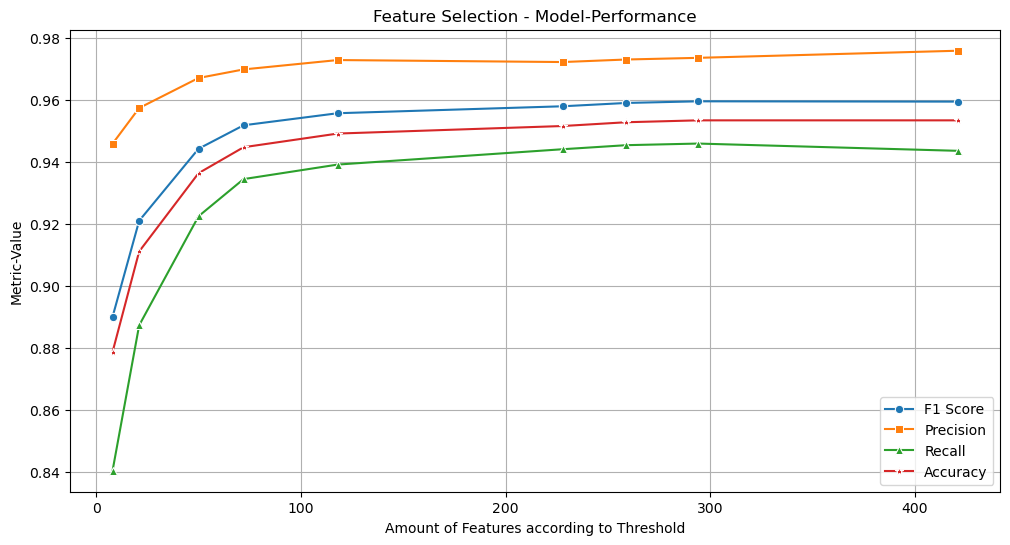

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ergebnisse sortieren nach Anzahl der Features
results_df = results_df.sort_values(by="Num Features")

plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x="Num Features", y="F1 Score", marker="o", label="F1 Score")
sns.lineplot(data=results_df, x="Num Features", y="Precision", marker="s", label="Precision")
sns.lineplot(data=results_df, x="Num Features", y="Recall", marker="^", label="Recall")
sns.lineplot(data=results_df, x="Num Features", y="Accuracy", marker="*", label="Accuracy")

plt.xlabel("Amount of Features according to Threshold")
plt.ylabel("Metric-Value")
plt.title("Feature Selection - Model-Performance")
plt.legend()
plt.grid(True)
plt.show()

In [99]:
import numpy as np

# All possible Thresholds from Feature-Importances
possible_thresholds = np.unique(feature_importance)

# Ergebnisse speichern
best_f1 = 0
best_threshold = None
best_num_features = 0
best_model = None

for threshold in possible_thresholds:
    # Features filter on Threshold
    important_features = X_train.columns[feature_importance > threshold]
    
    # Falls zu wenige Features übrig bleiben, überspringen
    if len(important_features) < 5:
        continue
    
    # Reduziertes Feature-Set erstellen
    X_train_important = X_train[important_features]
    X_test_important = X_test[important_features]
    
    # XGBoost trainieren
    xgb_model = XGBClassifier(
        eval_metric="logloss", colsample_bytree=1, learning_rate=0.2, 
        max_depth=9, n_estimators=300, subsample=1, random_state=42
    )
    
    xgb_model.fit(X_train_important, y_train)
    y_pred_xgb = xgb_model.predict(X_test_important)
    
    # F1-Score berechnen
    f1 = f1_score(y_test, y_pred_xgb)
    
    # Falls F1-Score besser ist, speichere das Modell und den Threshold
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
        best_num_features = len(important_features)
        best_model = xgb_model

# Ergebnisse ausgeben
print(f"Best Threshold: {best_threshold}")
print(f"Number of Features: {best_num_features}")
print(f"Highest F1-Score: {best_f1}")


✅ Bester Threshold: 0.0008775775204412639
✅ Anzahl der Features: 267
✅ Höchster F1-Score: 0.9624357453538949


In [27]:
from skopt import BayesSearchCV

# Definiere den Suchraum für BayesSearch
param_space = {
    "n_estimators": (100, 500),  # number of trees
    "max_depth": (3, 10),  # depth of trees
    "learning_rate": (0.01, 0.3, "log-uniform"),  
    "subsample": (0.6, 1.0), 
    "colsample_bytree": (0.6, 1.0),  # Feature-Sample per Tree
}

# BayesSearch with 20 Iterationen
bayes_search = BayesSearchCV(
    xgb_model,
    param_space,
    n_iter=20,  
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42,
)

# Trainiere das Modell mit BayesSearch
bayes_search.fit(X_train, y_train)

# Beste Parameter & Performance ausgeben
print("Best XGBoost Parameters (BayesSearch):", bayes_search.best_params_)
print("Best XGBoost Accuracy:", bayes_search.best_score_)

Best XGBoost Parameters (BayesSearch): OrderedDict({'colsample_bytree': 0.6, 'learning_rate': 0.10562473004804805, 'max_depth': 8, 'n_estimators': 500, 'subsample': 1.0})
Best XGBoost Accuracy: 0.9526757867940298


## Voting Classifier

### Soft Voting

In [69]:
# Random Forest and XGBoost best results --> combining?

from sklearn.ensemble import VotingClassifier

# Ensemble 
voting_clf = VotingClassifier(
    estimators=[
        ("XGBoost", xgb_grid.best_estimator_),  # XGBoost-Modell after Gridsearch
        ("Random Forest", rf_model),  # Random Forest
        ("Logistic Regression", log_reg),  # LogReg  Baseline
    ],
    voting="soft"  # soft Probabilities
)
voting_clf.fit(X_train, y_train)
y_pred_ensemble = voting_clf.predict(X_test)

# Teste das Ensemble
ensemble_acc = voting_clf.score(X_test, y_test)
print(f"Voting Classifier Accuracy: {ensemble_acc}")
ensemble_f1 = f1_score(y_test, y_pred_ensemble)
print(f"Voting Classifier F1: {ensemble_f1}")

C:\Users\caspa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy: 0.9535166337536077
Voting Classifier F1: 0.9594379639448568


### Hard Voting

In [71]:
# Ensemble 
voting_clf = VotingClassifier(
    estimators=[
        ("XGBoost", xgb_grid.best_estimator_),  # XGBoost-Modell after Gridsearch
        ("Random Forest", rf_model),  # Random Forest
        ("Logistic Regression", log_reg),  # LogReg  Baseline
    ],
    voting="hard"  # soft Probabilities
)
voting_clf.fit(X_train, y_train)
y_pred_ensemble = voting_clf.predict(X_test)

# Teste das Ensemble
ensemble_acc = voting_clf.score(X_test, y_test)
print(f"Voting Classifier Accuracy: {ensemble_acc}")
ensemble_f1 = f1_score(y_test, y_pred_ensemble)
print(f"Voting Classifier F1: {ensemble_f1}")

C:\Users\caspa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy: 0.9504785052407717
Voting Classifier F1: 0.9568783068783069


# Interpretability

C:\Users\caspa\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


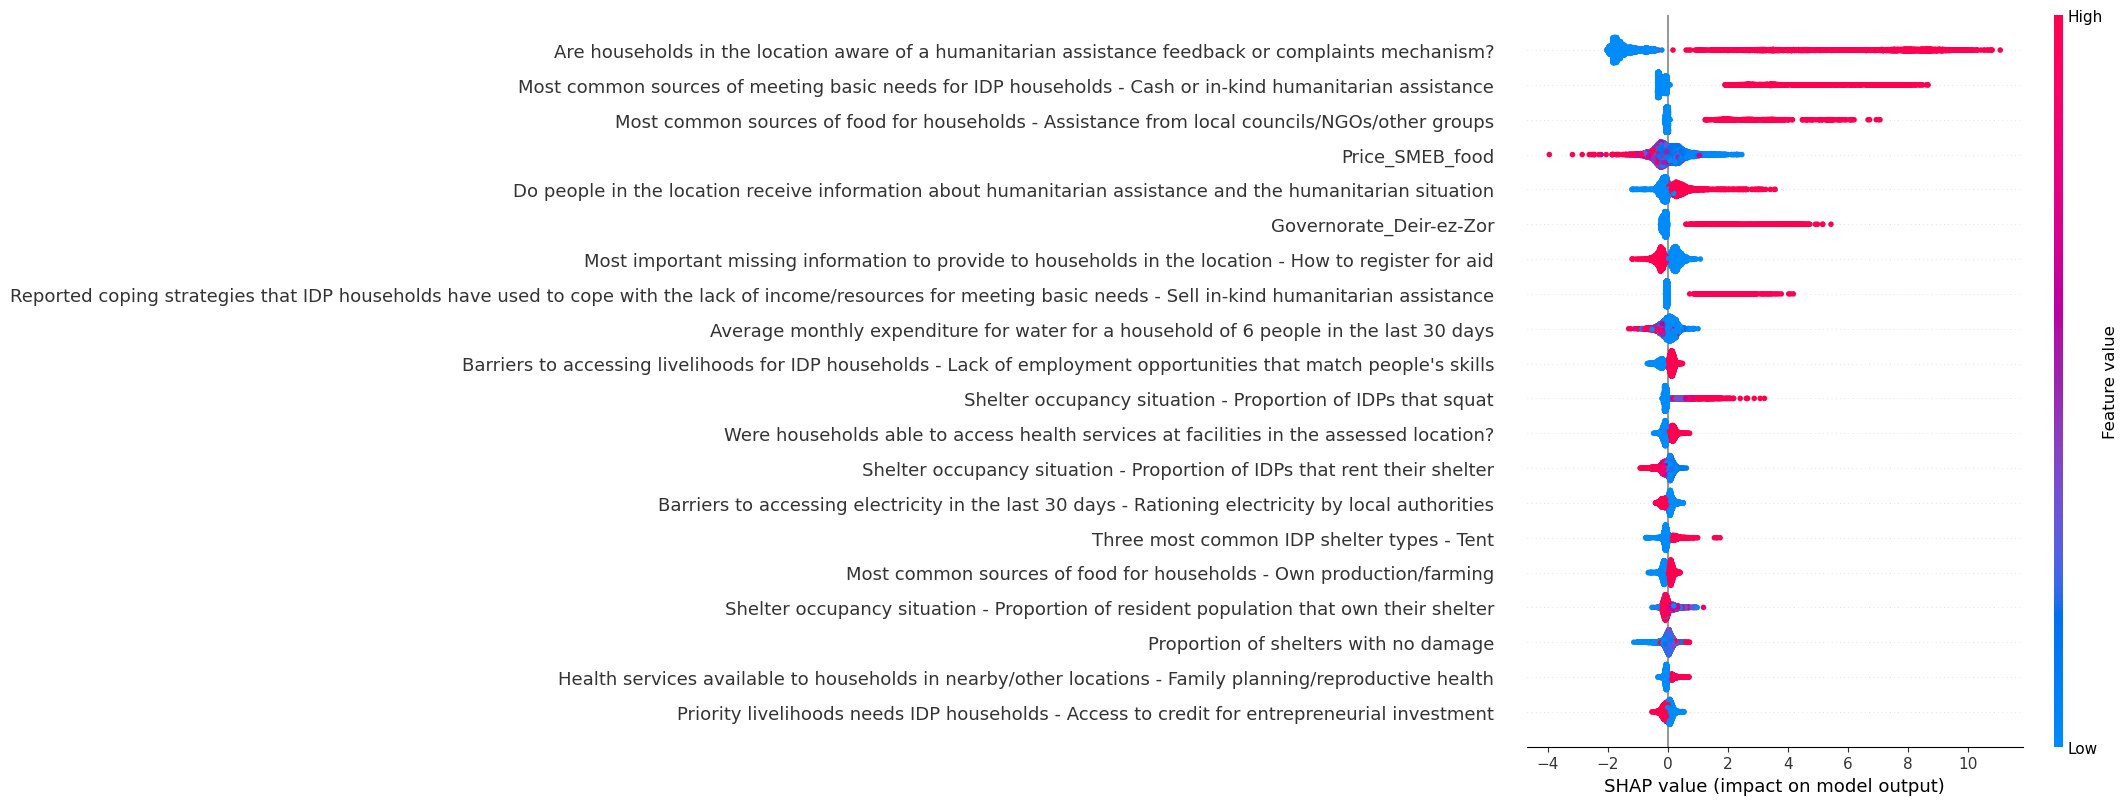

In [81]:
import shap
import matplotlib.pyplot as plt

# SHAP-Explainer
explainer = shap.Explainer(xgb_model)  
shap_values = explainer(X_test_important)

# Summary Plot
shap.summary_plot(shap_values, X_test_important)

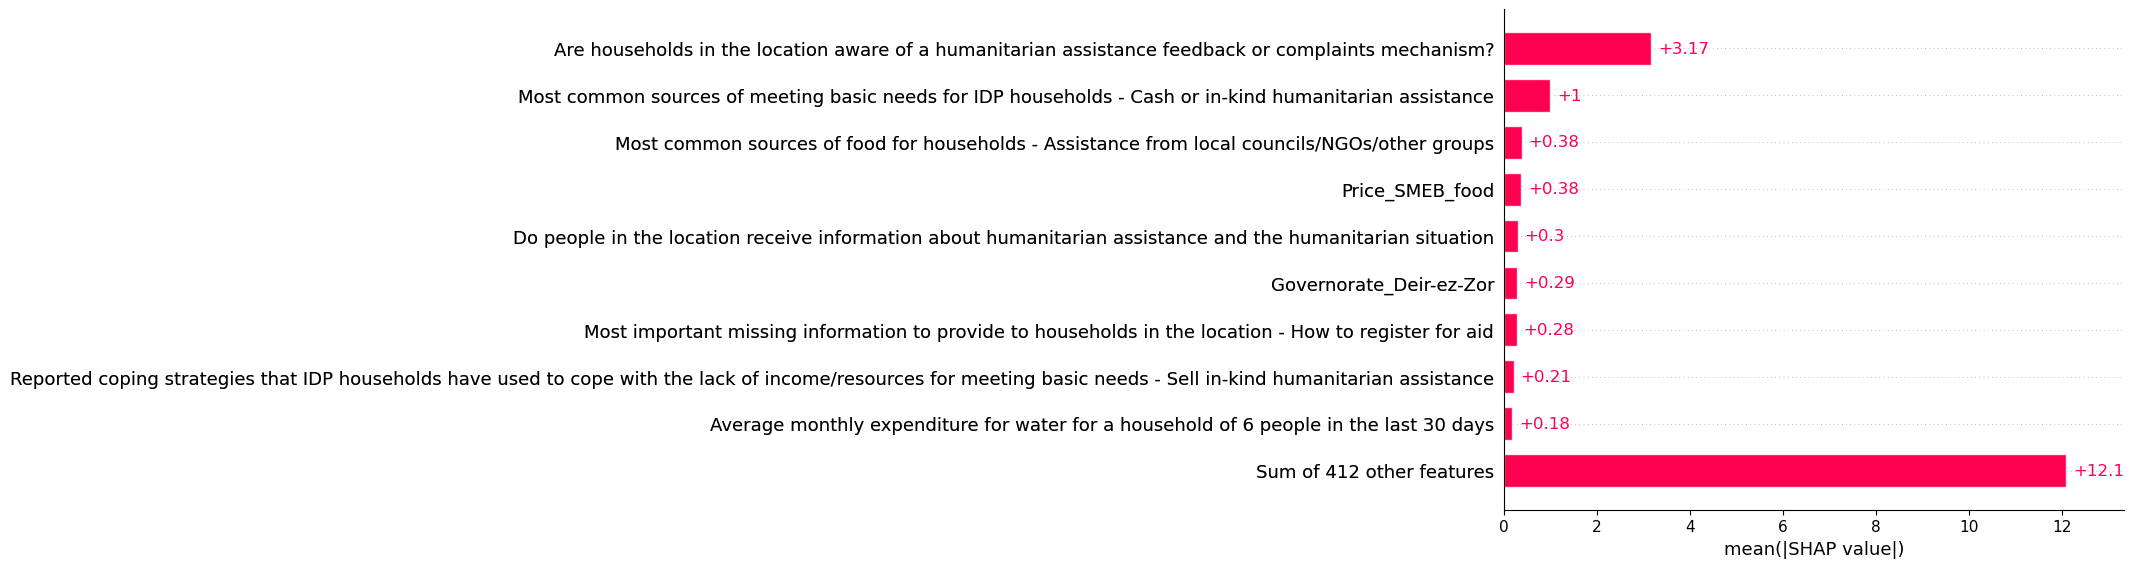

In [83]:
shap.plots.bar(shap_values)

# Deep Learning

## Basic DNN Model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_dnn = Sequential()
model_dnn.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_dnn.add(Dense(1, activation='sigmoid'))
model_dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
training_history = model_dnn.fit(X_train, y_train, epochs=30, batch_size=32, validation_split = 0.2)

C:\Users\caspa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
659/659 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8225 - loss: 0.3942 - val_accuracy: 0.9121 - val_loss: 0.2474
Epoch 2/30
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9181 - loss: 0.2266 - val_accuracy: 0.9223 - val_loss: 0.2201
Epoch 3/30
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9294 - loss: 0.1946 - val_accuracy: 0.9208 - val_loss: 0.2087
Epoch 4/30
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9393 - loss: 0.1695 - val_accuracy: 0.9206 - val_loss: 0.2119
Epoch 5/30
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9425 - loss: 0.1556 - val_accuracy: 0.9337 - val_loss: 0.1850
Epoch 6/30
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9528 - loss: 0.1344 - val_accuracy: 0.9333 - val_loss: 0.1821
Epoch 7/30
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9573 - loss: 0.1191 - val_accuracy: 0.9354 - val_loss: 0.1822
Epoch 8/30
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9589 - loss: 0.1099 - val_accuracy: 0.

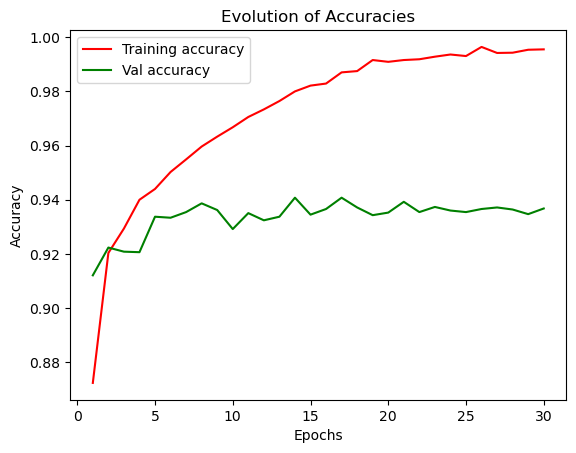

In [17]:
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

plt.figure()
plt.plot(np.arange(1,31,1), train_acc, color = "red", label = "Training accuracy")
plt.plot(np.arange(1,31,1), val_acc, color = "green", label = "Val accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Evolution of Accuracies")
plt.legend()
plt.show()

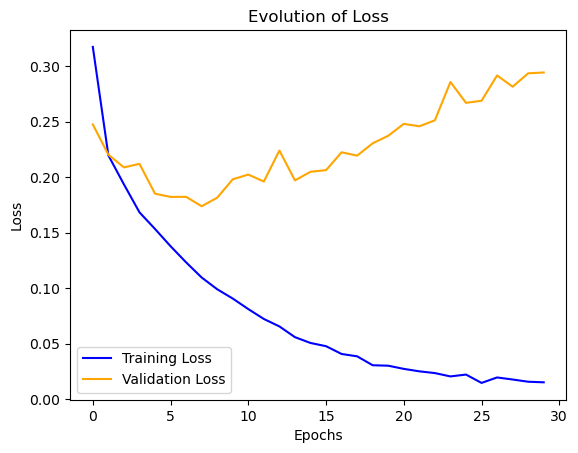

In [33]:
train_loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

plt.figure()
plt.plot(train_loss, label="Training Loss", color='blue')
plt.plot(val_loss, label="Validation Loss", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Evolution of Loss")
plt.legend()
plt.show()

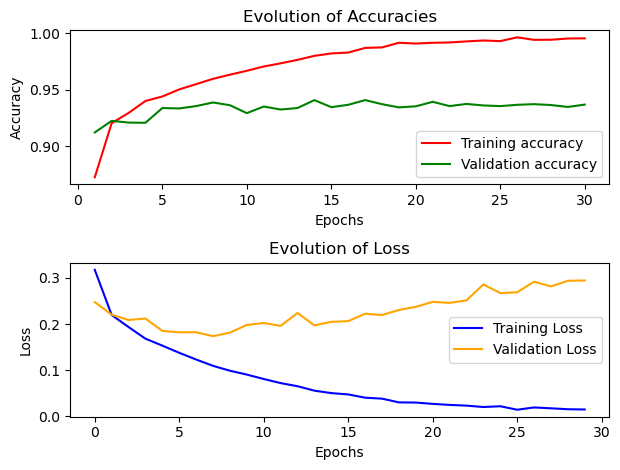

In [43]:
fig = plt.figure()

# Subplot for accuracy
ax1 = fig.add_subplot(211)
ax1.plot(np.arange(1, 31, 1), train_acc, color="red", label="Training accuracy")
ax1.plot(np.arange(1, 31, 1), val_acc, color="green", label="Validation accuracy")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.set_title("Evolution of Accuracies")
ax1.legend()

# Subplot for loss
ax2 = fig.add_subplot(212)
ax2.plot(train_loss, label="Training Loss", color='blue')
ax2.plot(val_loss, label="Validation Loss", color='orange')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.set_title("Evolution of Loss")
ax2.legend()

plt.tight_layout()
plt.show()

## Finetuning, More complex model and learning rate scheduling

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import keras_tuner as kt
import numpy as np
import matplotlib.pyplot as plt

# Function to build the model for tuning
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units_input', min_value=64, max_value=256, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    
    for i in range(hp.Int('num_layers', 1, 3)):  # Tune between 1 and 3 hidden layers
        model.add(Dense(hp.Int(f'units_{i}', min_value=64, max_value=256, step=32)))
        model.add(LeakyReLU(alpha=0.1))  
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout', 0.2, 0.5, step=0.1)))  # Tune dropout

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


In [49]:
# Hyperparameter Tuning with KerasTuner
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=10,  # Try 10 different combinations
                        directory='tuner_results',
                        project_name='dnn_tuning')

tuner.search(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Get best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

Reloading Tuner from tuner_results\dnn_tuning\tuner0.json


NameError: name 'X_val' is not defined

In [27]:
# Train with best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

history = best_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[lr_scheduler])

Epoch 1/30


C:\Users\caspa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\caspa\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


659/659 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8215 - loss: 0.4166 - val_accuracy: 0.9170 - val_loss: 0.2339 - learning_rate: 0.0010
Epoch 2/30
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9119 - loss: 0.2466 - val_accuracy: 0.9147 - val_loss: 0.2256 - learning_rate: 0.0010
Epoch 3/30
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9252 - loss: 0.2035 - val_accuracy: 0.9237 - val_loss: 0.2087 - learning_rate: 0.0010
Epoch 4/30
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9316 - loss: 0.1819 - val_accuracy: 0.9005 - val_loss: 0.2465 - learning_rate: 0.0010
Epoch 5/30
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9385 - loss: 0.1699 - val_accuracy: 0.9240 - val_loss: 0.2064 - learning_rate: 0.0010
Epoch 6/30
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9458 - loss: 0.1509 - val_accuracy: 0.9339 - val_loss: 0.1940 - learning_rate: 0.0010
Epoch 7/30
659/659 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9468 - loss: 0.1356 - val_accurac

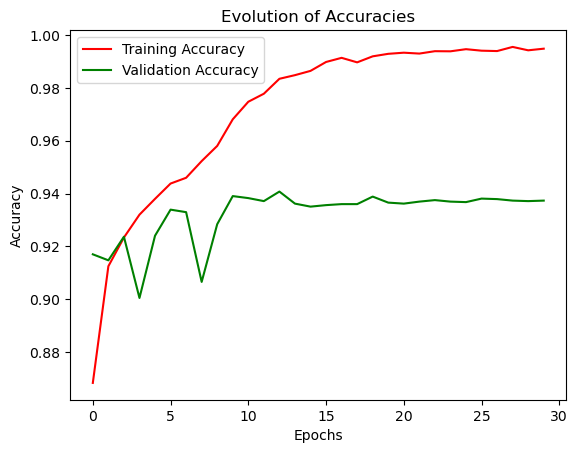

In [29]:
# Plot accuracy
plt.figure()
plt.plot(history.history['accuracy'], label="Training Accuracy", color='red')
plt.plot(history.history['val_accuracy'], label="Validation Accuracy", color='green')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Evolution of Accuracies")
plt.legend()
plt.show()

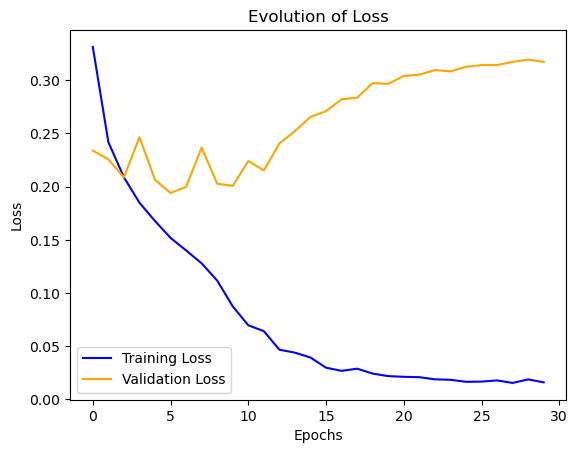

In [31]:
plt.figure()
plt.plot(history.history['loss'], label="Training Loss", color='blue')
plt.plot(history.history['val_loss'], label="Validation Loss", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Evolution of Loss")
plt.legend()
plt.show()

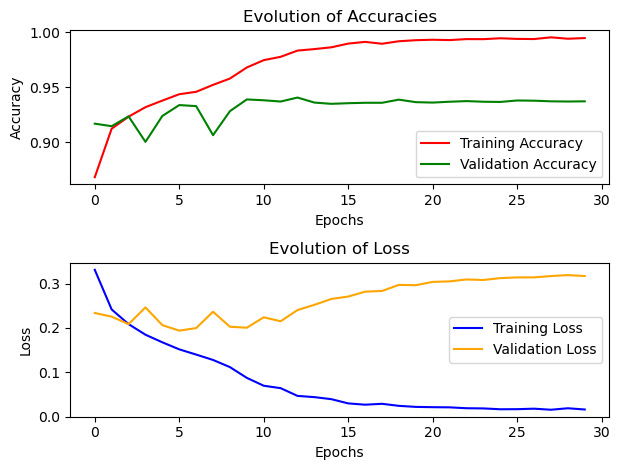

In [39]:
fig = plt.figure()

# Subplot for accuracy
ax1 = fig.add_subplot(211)
ax1.plot(history.history['accuracy'], label="Training Accuracy", color='red')
ax1.plot(history.history['val_accuracy'], label="Validation Accuracy", color='green')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.set_title("Evolution of Accuracies")
ax1.legend()

# Subplot for loss
ax2 = fig.add_subplot(212)
ax2.plot(history.history['loss'], label="Training Loss", color='blue')
ax2.plot(history.history['val_loss'], label="Validation Loss", color='orange')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.set_title("Evolution of Loss")
ax2.legend()

plt.tight_layout()
plt.show()